<a href="https://colab.research.google.com/github/didch1789/RSC_functions/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [173]:
folderdir = '/content/drive/MyDrive/대학원/Colab Notebooks/Assignment#10_dataset'

In [174]:
trainX = np.array(pd.read_csv(os.path.join(folderdir, 'homework_train_data.csv'), header =None))[:,:,np.newaxis]
trainY = np.array(pd.read_csv(os.path.join(folderdir, 'homework_train_label.csv'), header =None))
testX = np.array(pd.read_csv(os.path.join(folderdir, 'homework_test_data.csv'), header =None))[:,:,np.newaxis]
testY =np.array(pd.read_csv(os.path.join(folderdir, 'homework_test_label.csv'), header =None))

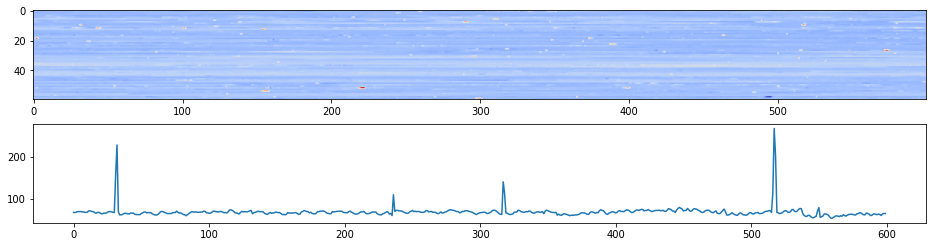

In [175]:
# whole data visualization
plt.figure(figsize = (16, 4))
plt.subplot(2, 1, 1)
plt.imshow(trainX.squeeze(), cmap='coolwarm')
# Sample data visualization
plt.subplot(2, 1, 2)
plt.plot(trainX[10, :])

In [176]:
trainset = tf.data.Dataset.from_tensor_slices((trainX, trainY))
testset =  tf.data.Dataset.from_tensor_slices((testX, testY))

In [177]:
BATCH_SIZE = 8
trainset = trainset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
testset = testset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [178]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(3,return_sequences=True,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [179]:
# ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                       patience=5,
#                                       mode='min',min_delta=1e-10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.build((None, 600, 1))
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_33 (SimpleRNN)   (None, 600, 3)            15        
                                                                 
 flatten_20 (Flatten)        (None, 1800)              0         
                                                                 
 batch_normalization_7 (Batc  (None, 1800)             7200      
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 1800)              0         
                                                                 
 dense_64 (Dense)            (None, 64)                115264    
                                                                 
 dense_65 (Dense)            (None, 2)                 130       
                                                     

In [ ]:
history = model.fit(trainset, validation_data=testset, epochs=15)#, callbacks=[ES])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 7s 641ms/step - loss: 3.2678 - accuracy: 0.4500 - val_loss: 7.6244 - val_accuracy: 0.3500
Epoch 2/15
8/8 [==============================] - 5s 601ms/step - loss: 0.5358 - accuracy: 0.7833 - val_loss: 8.3421 - val_accuracy: 0.6500
Epoch 3/15
8/8 [==============================] - 5s 601ms/step - loss: 0.7968 - accuracy: 0.5833 - val_loss: 4.9188 - val_accuracy: 0.6500
Epoch 4/15
8/8 [==============================] - 5s 604ms/step - loss: 0.7259 - accuracy: 0.6000 - val_loss: 1.6184 - val_accuracy: 0.6500
Epoch 5/15
8/8 [==============================] - 5s 622ms/step - loss: 0.6502 - accuracy: 0.5500 - val_loss: 0.5985 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 5s 592ms/step - loss: 0.5933 - accuracy: 0.6500 - val_loss: 0.6507 - val_accuracy: 0.6500
Epoch 7/15
8/8 [==============================] - 5s 604ms/step - loss: 0.5529 - accuracy: 0.7667 - val_loss: 0.6135 - val_accuracy: 0.6750
Epoch 8/15
8/8 [===============

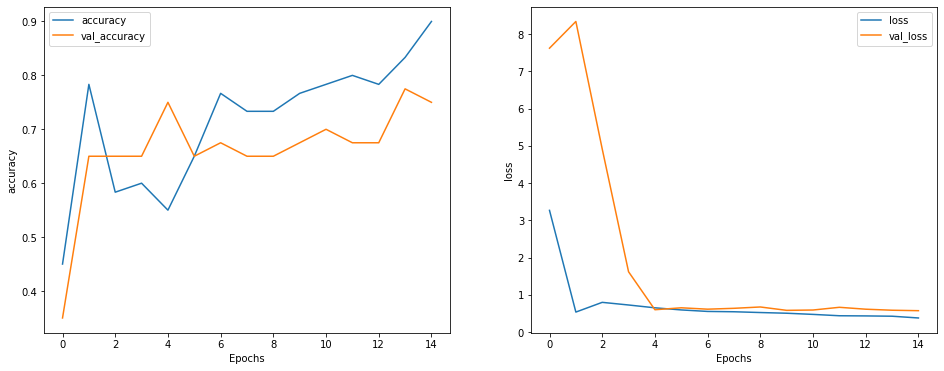

In [ ]:
def plot_graphs(history, metric): 
    plt.plot(history.history[metric])  
    plt.plot(history.history[f'val_{metric}'], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}']) #'val_'+metric
    
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')